In [3]:
#### Basic 

import os
import random
import re
import math
import time
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join

# Scikit-learn

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score

# Deep Learning

from tqdm import tqdm
from tqdm.keras import TqdmCallback
import tensorflow as tf, re, math
import tensorflow.keras.backend as K
from tensorflow.keras.layers import *
import efficientnet.tfkeras as efn
from keras import layers
from keras.applications import DenseNet121
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam

# Visualization

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly
import plotly.express as px
from plotly.tools import FigureFactory as FF
from plotly.offline import iplot
import seaborn as sns
%matplotlib inline

# Misc

import streamlit as st
from PIL import Image
import cufflinks
import cv2
import warnings
warnings.filterwarnings('ignore')

In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


<hr>
<h1>> Sharpening</h1>
<hr>

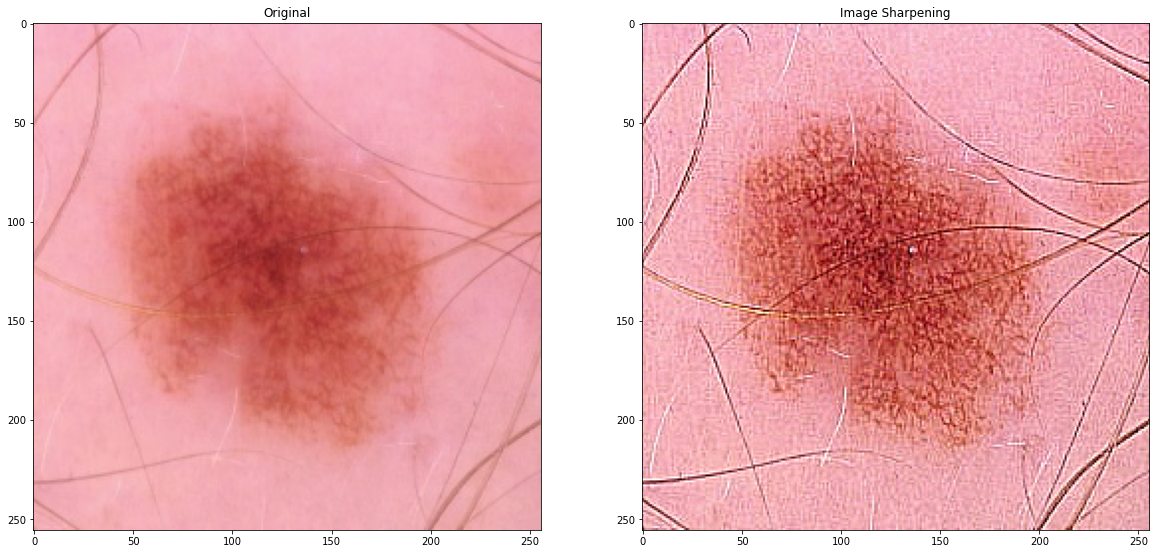

In [5]:
image = cv2.imread(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train\ISIC_0094701.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(image)

# Create our shapening kernel, we don't normalize since the 
# the values in the matrix sum to 1
kernel_sharpening = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])

# applying different kernels to the input image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)

plt.subplot(1, 2, 2)
plt.title("Image Sharpening")
plt.imshow(sharpened)

plt.show()

<hr>
<h1>> Thresholding, Binarization & Adaptive Thresholding</h1>
<hr>

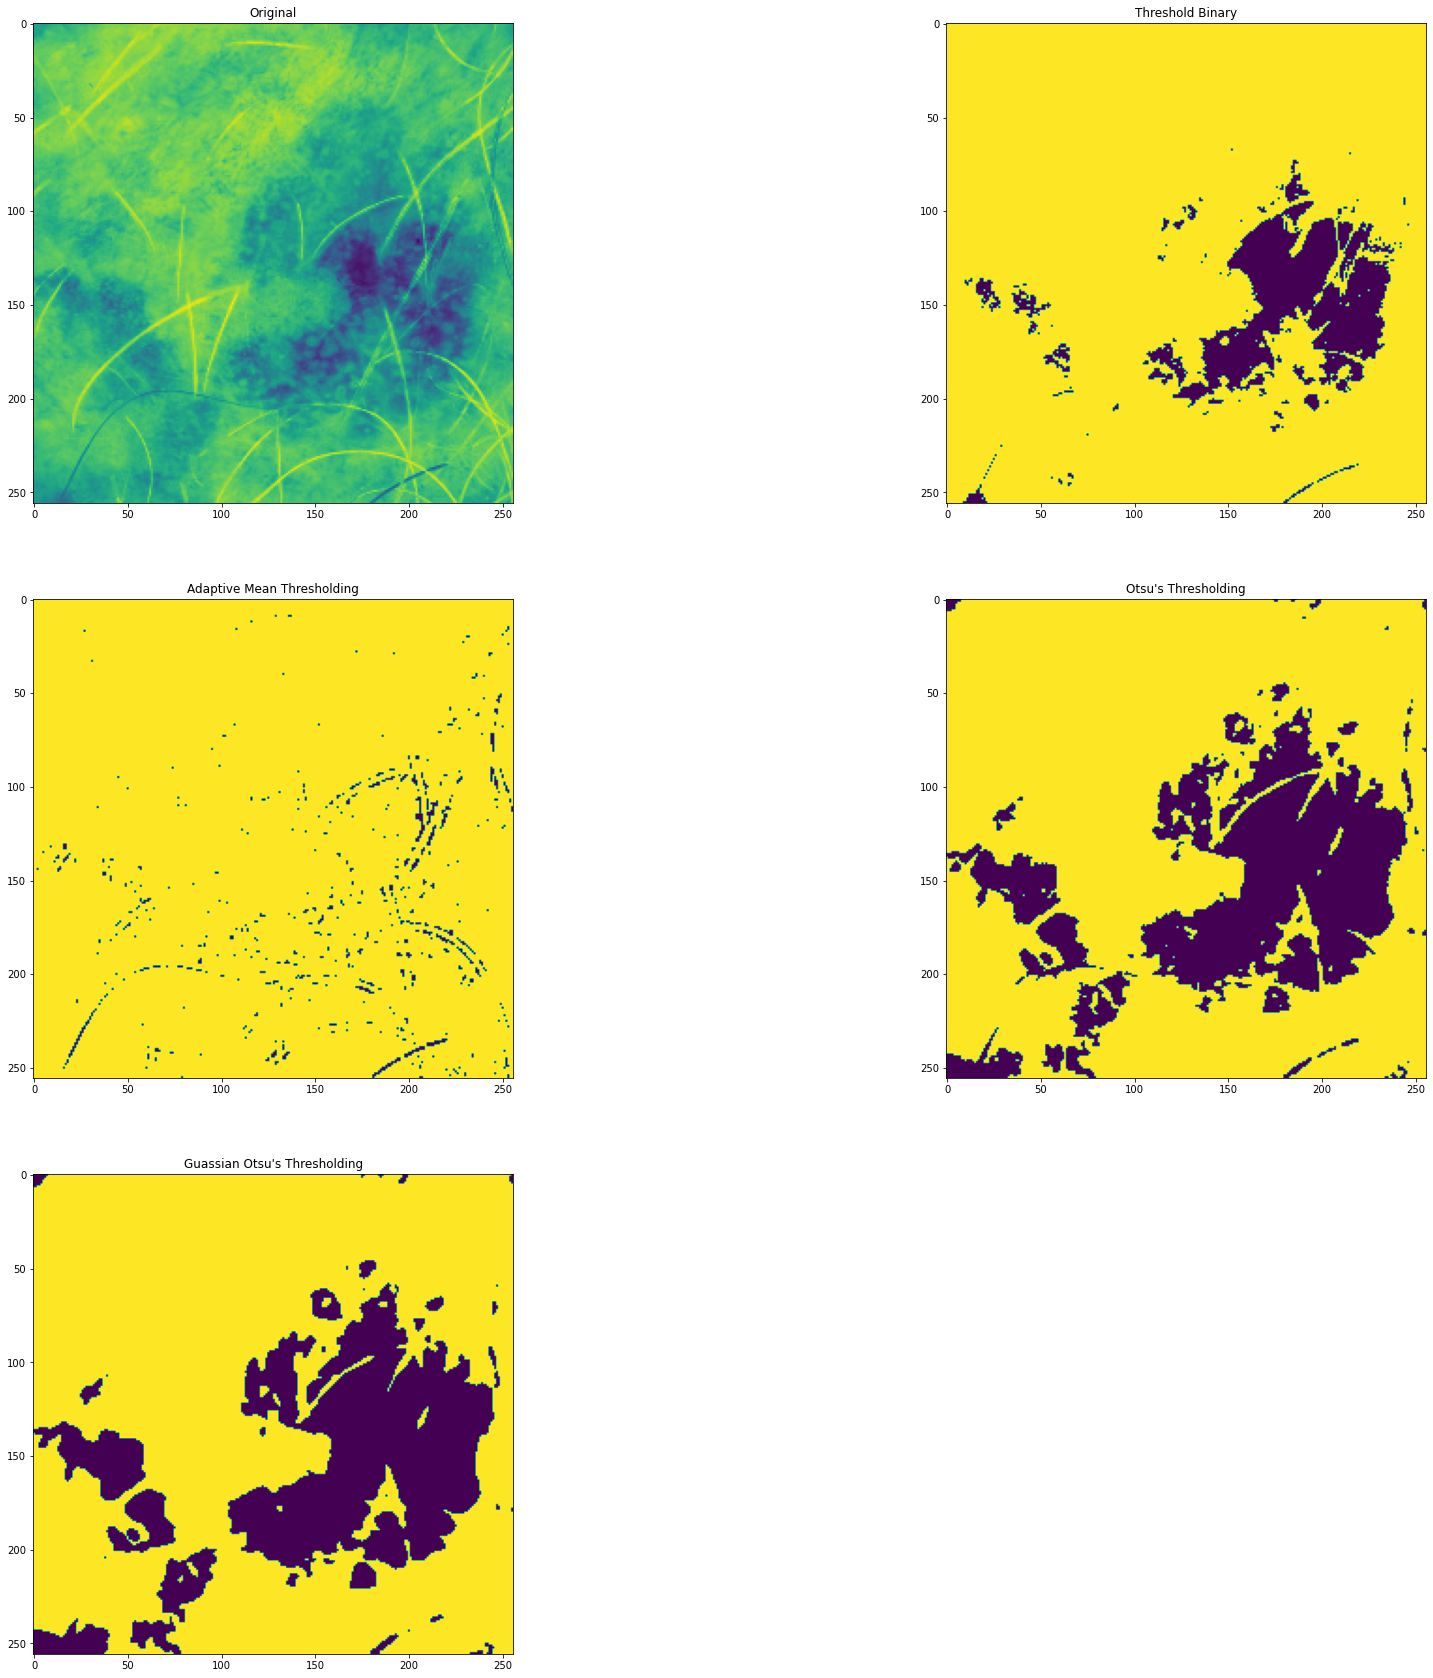

In [6]:
# Load our new image
image = cv2.imread(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train\ISIC_0082934.jpg', 0)

plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

plt.subplot(3, 2, 2)
plt.title("Threshold Binary")
plt.imshow(thresh1)


# It's good practice to blur images as it removes noise
image = cv2.GaussianBlur(image, (3, 3), 0)

# Using adaptiveThreshold
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 

plt.subplot(3, 2, 3)
plt.title("Adaptive Mean Thresholding")
plt.imshow(thresh)


_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.subplot(3, 2, 4)
plt.title("Otsu's Thresholding")
plt.imshow(th2)


plt.subplot(3, 2, 5)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.title("Guassian Otsu's Thresholding")
plt.imshow(th3)
plt.show()

<hr>
<h1>> Dilation, Erosion, Opening and Closing</h1>
<hr>

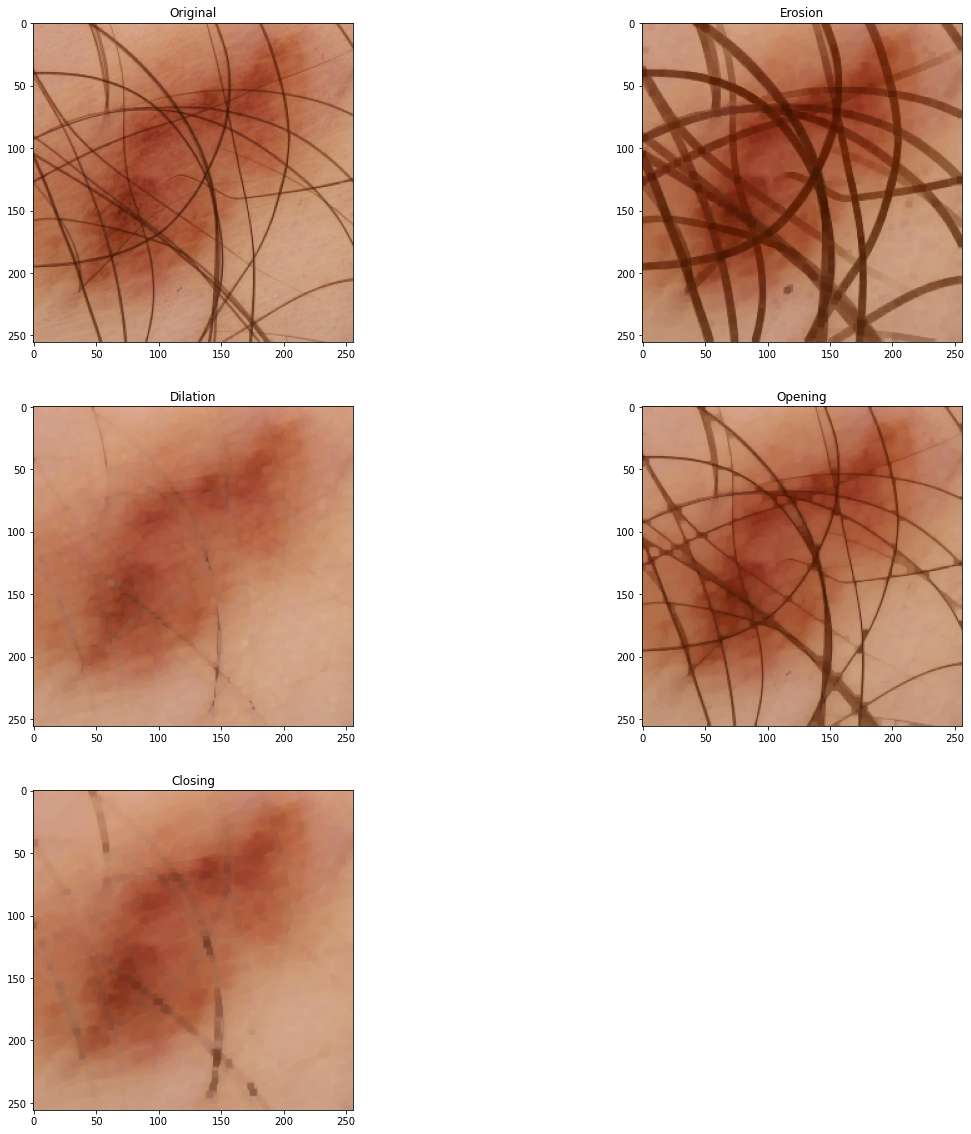

In [7]:
image = cv2.imread(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train\ISIC_0159746.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)


# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

# Now we erode
erosion = cv2.erode(image, kernel, iterations = 1)

plt.subplot(3, 2, 2)
plt.title("Erosion")
plt.imshow(erosion)

# 
dilation = cv2.dilate(image, kernel, iterations = 1)
plt.subplot(3, 2, 3)
plt.title("Dilation")
plt.imshow(dilation)


# Opening - Good for removing noise
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
plt.subplot(3, 2, 4)
plt.title("Opening")
plt.imshow(opening)


# Closing - Good for removing noise
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
plt.subplot(3, 2, 5)
plt.title("Closing")
plt.imshow(closing)

<hr>
<h1>> Edge Detection & Image Gradients</h1>
<hr>

2020-11-30 16:15:45.198 WARNING matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2020-11-30 16:15:45.217 WARNING matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2020-11-30 16:15:45.240 WARNING matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2020-11-30 16:15:45.263 WARNING matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


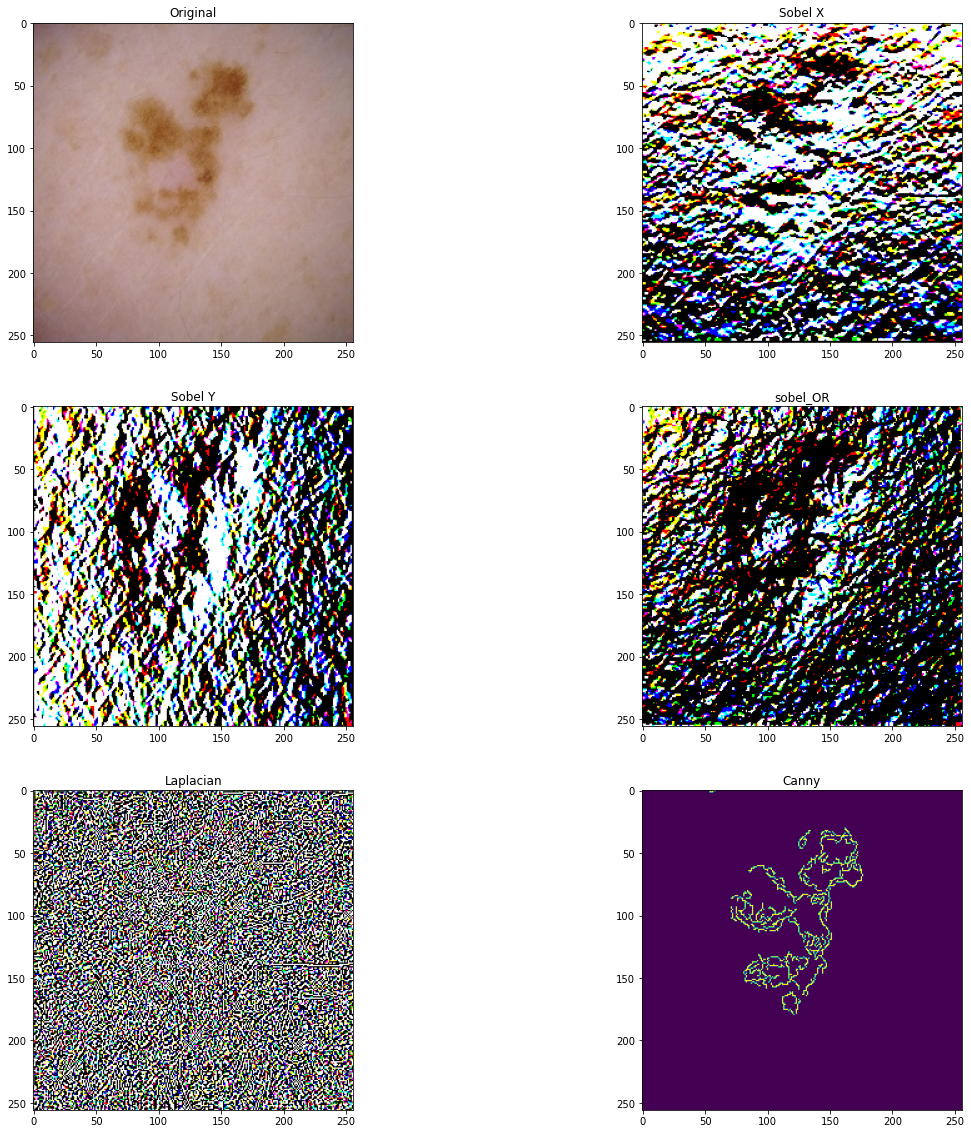

In [8]:
image = cv2.imread(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train\ISIC_0277340.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width,_ = image.shape

# Extract Sobel Edges
sobel_x = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)

plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)

plt.subplot(3, 2, 2)
plt.title("Sobel X")
plt.imshow(sobel_x)


plt.subplot(3, 2, 3)
plt.title("Sobel Y")
plt.imshow(sobel_y)

sobel_OR = cv2.bitwise_or(sobel_x, sobel_y)

plt.subplot(3, 2, 4)
plt.title("sobel_OR")
plt.imshow(sobel_OR)

laplacian = cv2.Laplacian(image, cv2.CV_64F)

plt.subplot(3, 2, 5)
plt.title("Laplacian")
plt.imshow(laplacian)


##  Then, we need to provide two values: threshold1 and threshold2. Any gradient value larger than threshold2
# is considered to be an edge. Any value below threshold1 is considered not to be an edge. 
#Values in between threshold1 and threshold2 are either classiﬁed as edges or non-edges based on how their 
#intensities are “connected”. In this case, any gradient values below 60 are considered non-edges
#whereas any values above 120 are considered edges.


# Canny Edge Detection uses gradient values as thresholds
# The first threshold gradient
canny = cv2.Canny(image, 50, 120)

plt.subplot(3, 2, 6)
plt.title("Canny")
plt.imshow(canny)

<hr>
<h1>> Perpsective Transform</h1>
<hr>

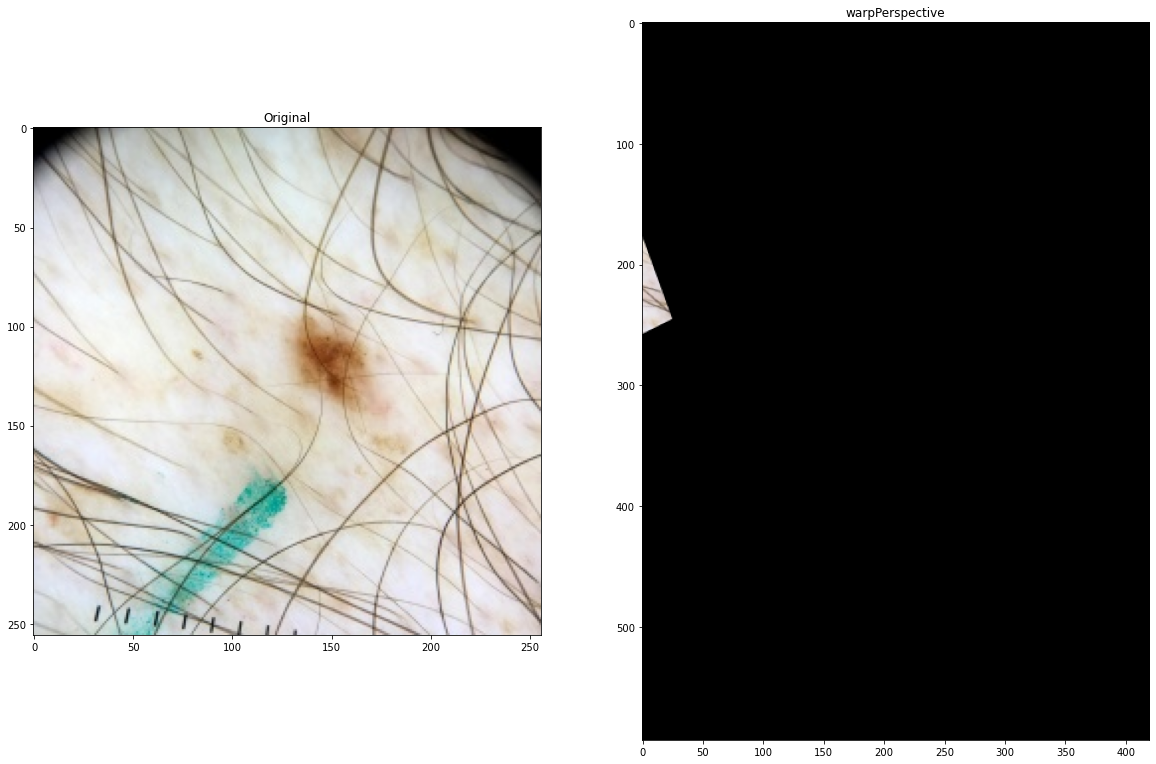

In [9]:
image = cv2.imread(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train\ISIC_0384214.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

# Cordinates of the 4 corners of the original image
points_A = np.float32([[320,15], [700,215], [85,610], [530,780]])

# Cordinates of the 4 corners of the desired output
# We use a ratio of an A4 Paper 1 : 1.41
points_B = np.float32([[0,0], [420,0], [0,594], [420,594]])
 
# Use the two sets of four points to compute 
# the Perspective Transformation matrix, M    
M = cv2.getPerspectiveTransform(points_A, points_B)
 
warped = cv2.warpPerspective(image, M, (420,594))

plt.subplot(1, 2, 2)
plt.title("warpPerspective")
plt.imshow(warped)

<hr>
<h1>> Scaling, re-sizing and interpolations</h1>
<hr>

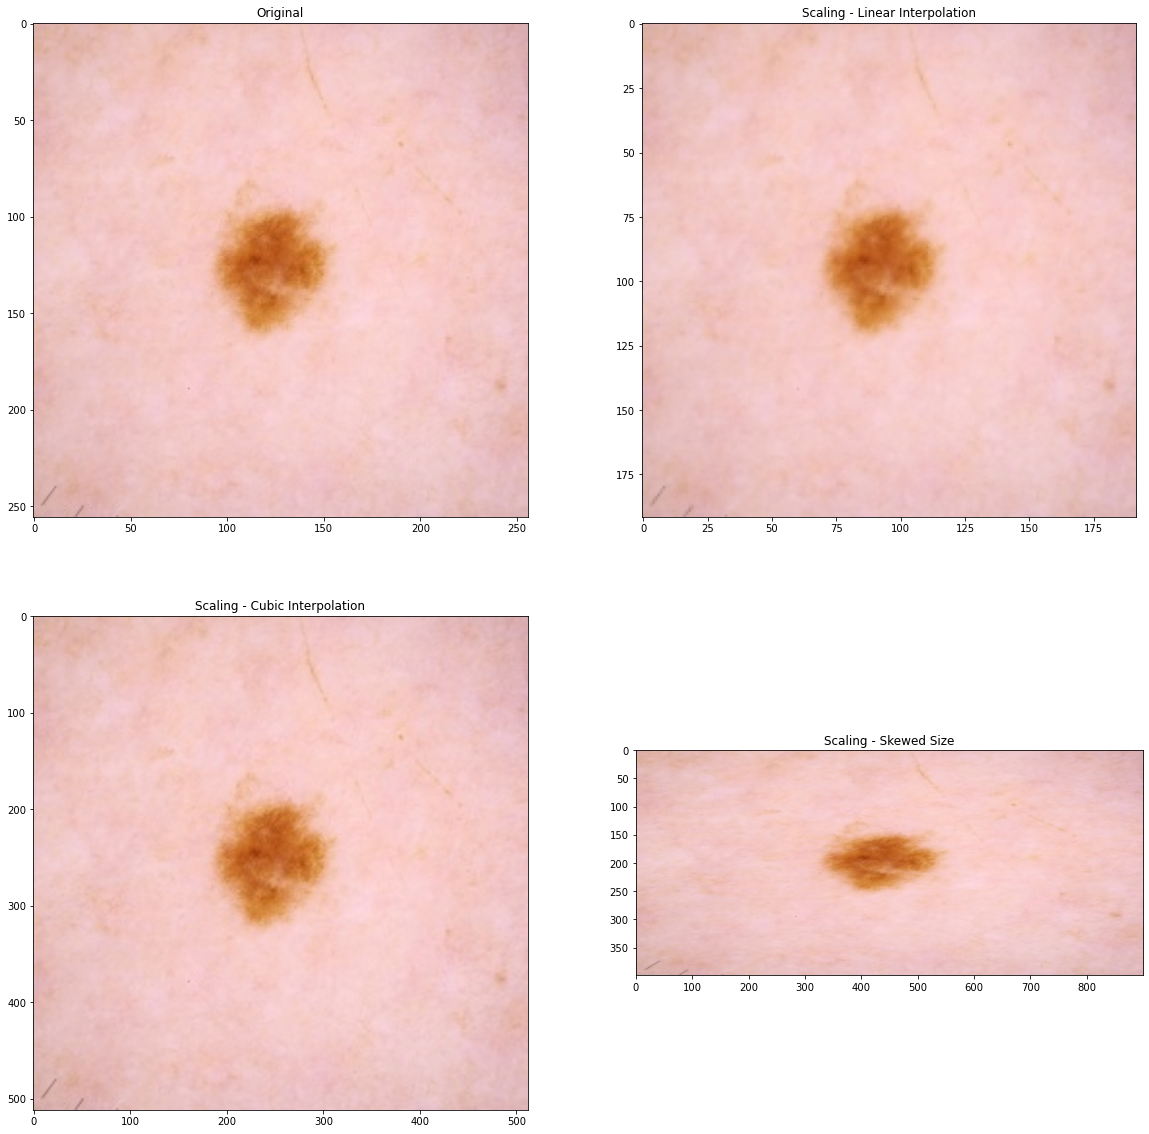

In [10]:
image = cv2.imread(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train\ISIC_0397577.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)

# Let's make our image 3/4 of it's original size
image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)

plt.subplot(2, 2, 2)
plt.title("Scaling - Linear Interpolation")
plt.imshow(image_scaled)

# Let's double the size of our image
img_scaled = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

plt.subplot(2, 2, 3)
plt.title("Scaling - Cubic Interpolation")
plt.imshow(img_scaled)

# Let's skew the re-sizing by setting exact dimensions
img_scaled = cv2.resize(image, (900, 400), interpolation = cv2.INTER_AREA)

plt.subplot(2, 2, 4)
plt.title("Scaling - Skewed Size")
plt.imshow(img_scaled)

<hr>
<h1>> Image Pyramids</h1>
<hr>

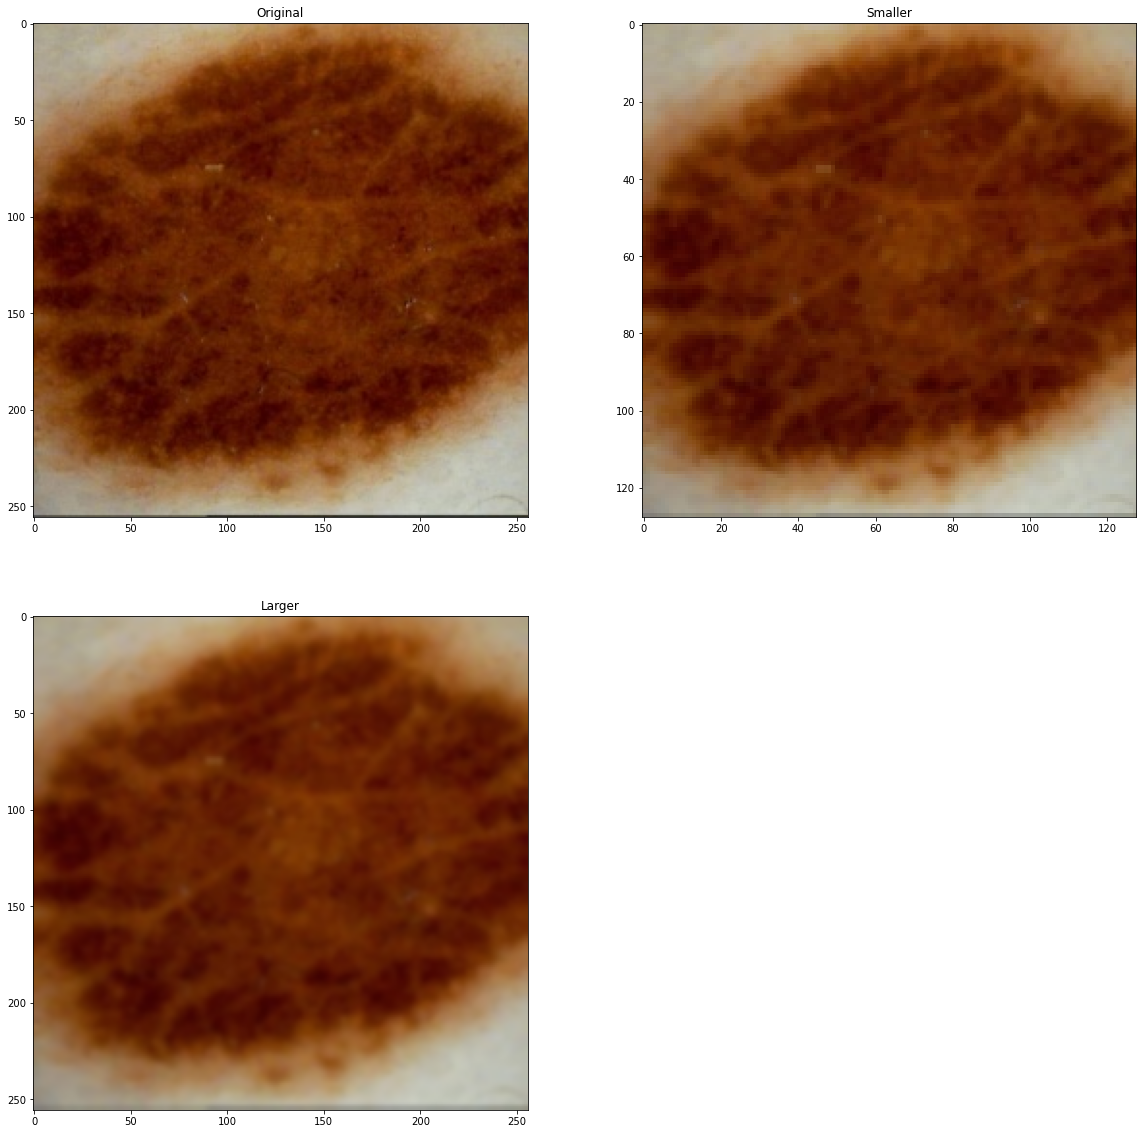

In [11]:
image = cv2.imread(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train\ISIC_0465938.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)

smaller = cv2.pyrDown(image)
larger = cv2.pyrUp(smaller)

plt.subplot(2, 2, 2)
plt.title("Smaller")
plt.imshow(smaller)

plt.subplot(2, 2, 3)
plt.title("Larger")
plt.imshow(larger)

<hr>
<h1>> Cropping</h1>
<hr>

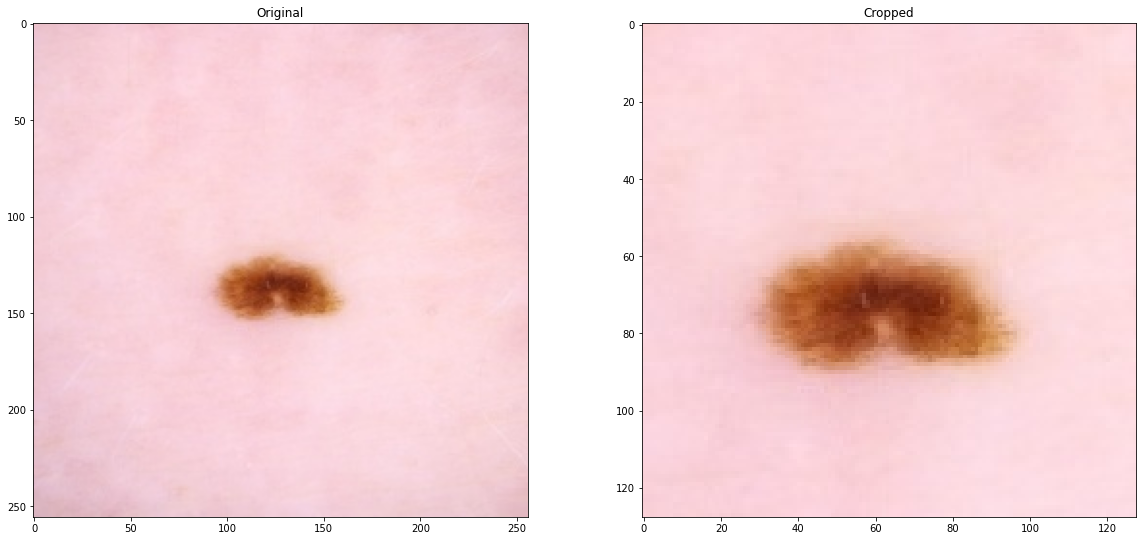

In [12]:
image = cv2.imread(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train\ISIC_0464730.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)

height, width = image.shape[:2]

# Let's get the starting pixel coordiantes (top  left of cropping rectangle)
start_row, start_col = int(height * .25), int(width * .25)

# Let's get the ending pixel coordinates (bottom right)
end_row, end_col = int(height * .75), int(width * .75)

# Simply use indexing to crop out the rectangle we desire
cropped = image[start_row:end_row , start_col:end_col]


plt.subplot(2, 2, 2)
plt.title("Cropped")
plt.imshow(cropped)

<hr>
<h1>> Blurring</h1>
<hr>

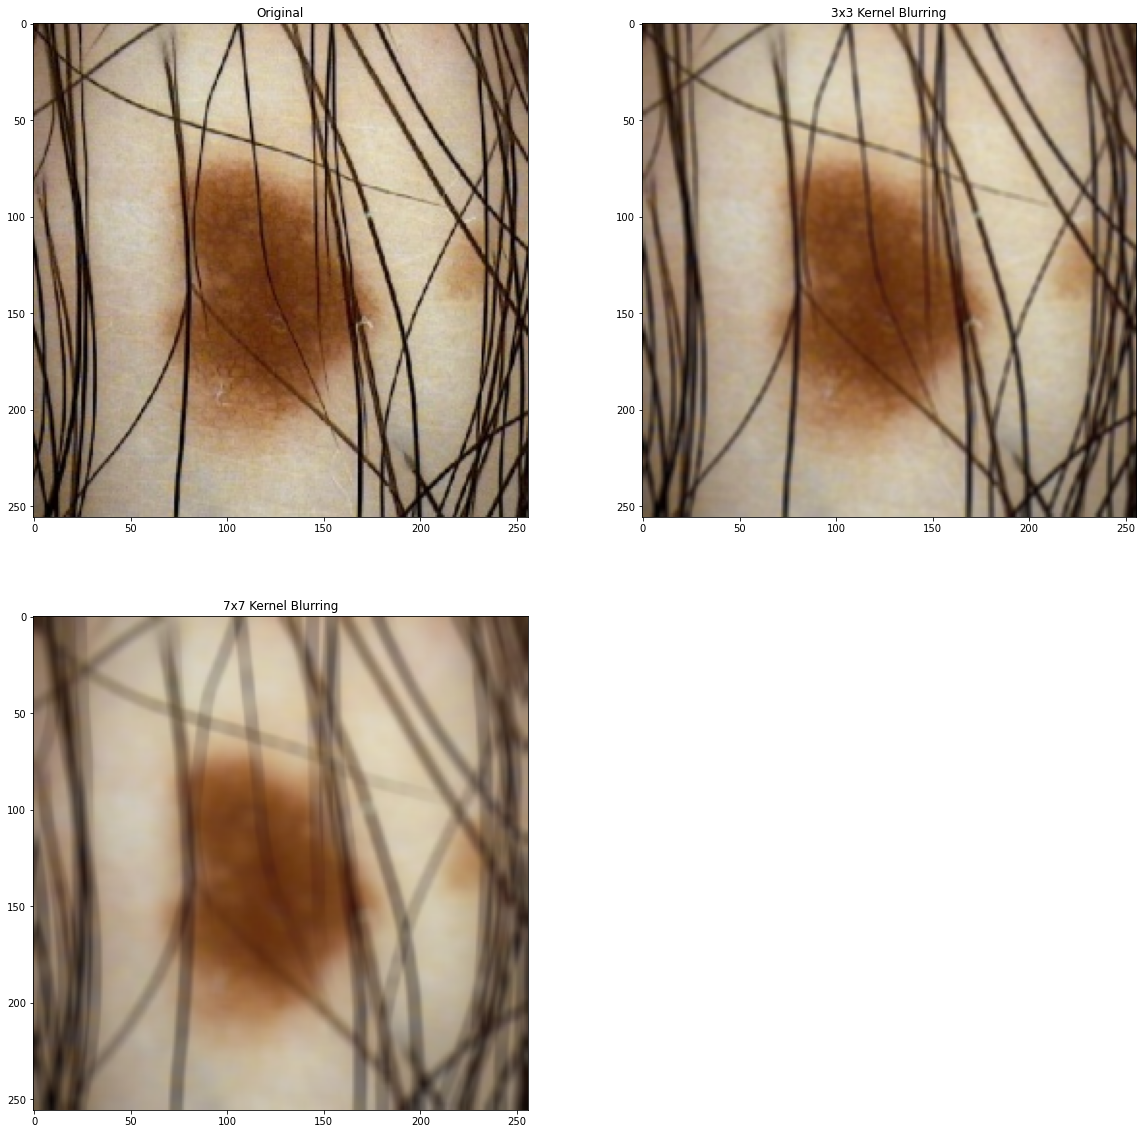

In [13]:
image = cv2.imread(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train\ISIC_0472490.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)

# Creating our 3 x 3 kernel
kernel_3x3 = np.ones((3, 3), np.float32) / 9

# We use the cv2.fitler2D to conovlve the kernal with an image 
blurred = cv2.filter2D(image, -1, kernel_3x3)

plt.subplot(2, 2, 2)
plt.title("3x3 Kernel Blurring")
plt.imshow(blurred)

# Creating our 7 x 7 kernel
kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.filter2D(image, -1, kernel_7x7)

plt.subplot(2, 2, 3)
plt.title("7x7 Kernel Blurring")
plt.imshow(blurred2)

<hr>
<h1>> Contours</h1>
<hr>

Number of Contours found = 102


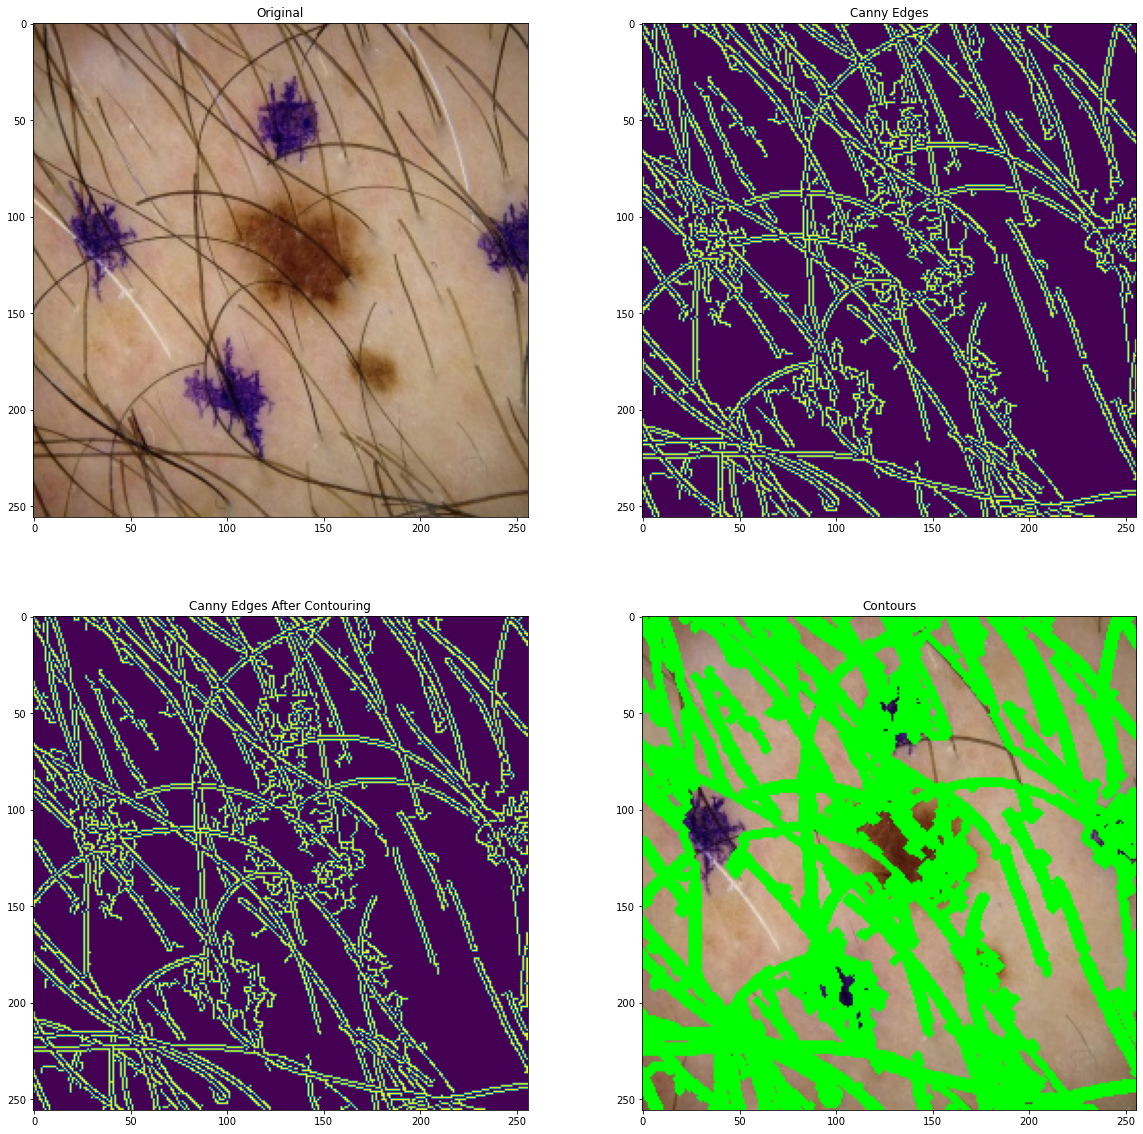

In [14]:
# Let's load a simple image with 3 black squares
image = cv2.imread(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train\ISIC_0356904.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)


# Grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)

plt.subplot(2, 2, 2)
plt.title("Canny Edges")
plt.imshow(edged)


# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

plt.subplot(2, 2, 3)
plt.title("Canny Edges After Contouring")
plt.imshow(edged)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), 3)

plt.subplot(2, 2, 4)
plt.title("Contours")
plt.imshow(image)